# MLP for timeseries example

In [9]:
from sam.models import TimeseriesMLP
from sam.feature_engineering import SimpleFeatureEngineer

import pandas as pd

In [13]:
data = pd.read_feather("../data/rainbow_beach.feather").set_index('TIME')
data.head()

TYPE,Battery Life,Transducer Depth,Turbidity,Water Temperature,Wave Height,Wave Period
TIME,,,,,,
2014-06-15 00:00:00,11.6,1.495,0.85,16.6,0.136,3.0
2014-06-15 01:00:00,11.6,1.420,0.87,16.3,0.117,4.0
2014-06-15 02:00:00,11.6,1.478,0.79,16.1,0.114,7.0
2014-06-15 03:00:00,11.6,1.518,0.76,15.9,0.111,3.0
2014-06-15 04:00:00,11.6,1.507,0.77,15.7,0.107,3.0


In [12]:
simple_features = SimpleFeatureEngineer(
    rolling_features=[
        ("Wave Height", "mean", 48),
        ("Wave Height", "mean", 24),
        ("Wave Height", "mean", 12),
    ],
    time_features=[
        ("hour_of_day", "cyclical"),
        ("day_of_week", "cyclical"),
    ],
    keep_original=False,
)

X = data
y = data['water_temperature']
ix = simple_features.fit_transform(X).dropna(how="any").index[0]
simple_features.fit_transform(X)[ix:].isna().sum()


Wave Height_mean_48         0
Wave Height_mean_24         0
Wave Height_mean_12         0
hour_of_day_cyclical_sin    0
hour_of_day_cyclical_cos    0
day_of_week_cyclical_sin    0
day_of_week_cyclical_cos    0
dtype: int64

In [ ]:
model = TimeseriesMLP(
    predict_ahead=0,
    feature_engineer=simple_features,
    use_diff_of_y=False,
    epochs=20,
    verbose=0
)

model.fit(X, y)

/home/arjan/projects/SAM/sam/sam/models/base_model.py:128: UserWarning: No timecolumn given. Make sure the data ismonospaced when given to this model!
  warnings.warn(
/home/arjan/projects/SAM/sam/.env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


/home/arjan/projects/SAM/sam/sam/models/base_model.py:128: UserWarning: No timecolumn given. Make sure the data ismonospaced when given to this model!
  warnings.warn(


<AxesSubplot:xlabel='TIME'>

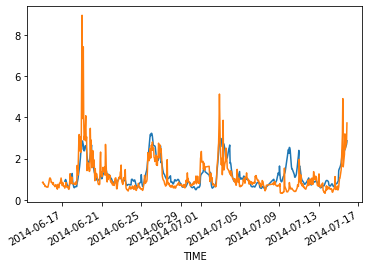

In [ ]:
model.predict(X, y).plot()
y.plot()